### Calculating Probability of Detection For a Range of Civilizations

In [48]:
from random import randint
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [50]:
num_equi_volumes = 1000 #number of equivalent volumes of bubble than can fit in the galaxy
max_civils = 5000 #Number of maximum civilations
trials = 1000 #number of trails to go through
civils_step_size = 100 # Step size for trails
x = [] #X axis values for graph
y = [] #Y axis values for graph

In [52]:
for num_civils in range(2,max_civils+2,civils_step_size): #it takes at least 2 civil. in same bubble to detect each other.
    #we model each number of civilization distribution for 100 trials.
    civils_per_volume = num_civils / num_equi_volumes
    num_single_civils = 0
    for trial in range(trials):
        locations = [] #assign the random location to each
        while len(locations)<num_civils:
            loc = randint(1,num_equi_volumes)
            locations.append(loc)
        count = Counter(locations)
        values_count = Counter(count.values())
        num_single_civils += values_count[1]

    prob = 1 - (num_single_civils/(num_civils * trials))

    print(f"{civils_per_volume:.4f} {prob:.4f}")
    x.append(civils_per_volume)
    y.append(prob)


0.0020 0.0020
0.1020 0.0966
0.2020 0.1820
0.3020 0.2619
0.4020 0.3316
0.5020 0.3956
0.6020 0.4519
0.7020 0.5059
0.8020 0.5521
0.9020 0.5939
1.0020 0.6323
1.1020 0.6679
1.2020 0.6990
1.3020 0.7280
1.4020 0.7541
1.5020 0.7772
1.6020 0.7987
1.7020 0.8178
1.8020 0.8347
1.9020 0.8510
2.0020 0.8648
2.1020 0.8779
2.2020 0.8898
2.3020 0.8998
2.4020 0.9096
2.5020 0.9183
2.6020 0.9258
2.7020 0.9330
2.8020 0.9394
2.9020 0.9452
3.0020 0.9504
3.1020 0.9549
3.2020 0.9593
3.3020 0.9633
3.4020 0.9668
3.5020 0.9699
3.6020 0.9728
3.7020 0.9752
3.8020 0.9777
3.9020 0.9797
4.0020 0.9817
4.1020 0.9835
4.2020 0.9851
4.3020 0.9865
4.4020 0.9878
4.5020 0.9889
4.6020 0.9900
4.7020 0.9910
4.8020 0.9918
4.9020 0.9926


           4           3          2
-0.004748 x + 0.06666 x - 0.3596 x + 0.9191 x + 0.01036


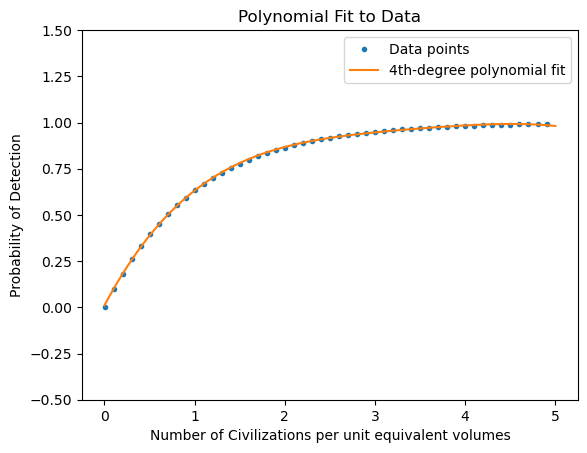

In [62]:
coefficients = np.polyfit(x,y,4)
p = np.poly1d(coefficients)
print(f"{p}")
xp = np.linspace(0,5,100)
plt.plot(x, y, '.', label='Data points')
plt.plot(xp, p(xp), '-', label='4th-degree polynomial fit')
plt.ylim(-0.5, 1.5)
plt.xlabel('Number of Civilizations per unit equivalent volumes')
plt.ylabel('Probability of Detection')
plt.title('Polynomial Fit to Data')
plt.legend()
plt.show()